In [1]:
import sys
sys.path.insert(0, '/home/marcelo/Workspace/MF_Model/Modules')

import mf_models as mf
import model_type as mt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Customize matplotlib
matplotlib.rcParams.update(
	{
		'text.usetex': False,
		'font.family': 'stixgeneral',
		'mathtext.fontset': 'stix',
		'font.size': 22,
		'ytick.color' : 'black',
		"xtick.color" : 'black',
		'axes.labelcolor' : 'black',
		'axes.edgecolor' : 'black'
	}
)


In [2]:
n = 30000

vec_tauE = np.array([1, 20, 70])
vec_tauE_label = ["1", "20", "70"]

vec_Vk = np.linspace(-80, -50, n + 1)

df_V_distr = pd.DataFrame({'Vk':vec_Vk})
df_V_distr_ad = pd.DataFrame({'Vk':vec_Vk})
df_V_distr_wI = pd.DataFrame({'Vk':vec_Vk})
df_V_distr_wI_ad = pd.DataFrame({'Vk':vec_Vk})

In [3]:
for tauE_val in vec_tauE:
	print(tauE_val)
	model_type = mt.MFCoBaIF(
				EL_val = -60,
				EE_val = 0,
				EI_val = -80,
				nuE_val = 0.005,
				nuI_val = 0.005,
				wE_val = 0.1,
				wI_val = 0.4,
				tauE_val = tauE_val,
				tauI_val = 10,
				KE_val = 400,
				KI_val = 100,
				Vth_val= -50,
				Vr_val = -60,
				tauL_val = 20,
				tauR_val = 2
)

	LV_model = mf.LangevinModel(model_type)
	FP_model = mf.FokkerPlanckModel(LV_model, True)

	nu = FP_model.calculate_firing_rate(vec_Vk)

	df_V_distr[tauE_val] = FP_model.integrate_p0(vec_Vk)*nu

1
20
70


In [4]:
for tauE_val in vec_tauE:
	print(tauE_val)
	model_type = mt.MFCoBaIF(
				EL_val = -60,
				EE_val = 0,
				EI_val = -80,
				nuE_val = 0.005,
				nuI_val = 0.005,
				wE_val = 0.1,
				wI_val = 0.4,
				tauE_val = tauE_val,
				tauI_val = 10,
				KE_val = 400,
				KI_val = 100,
				Vth_val= -50,
				Vr_val = -60,
				tauL_val = 20,
				tauR_val = 2
)

	LV_model = mf.LangevinModel(model_type)
	FP_model = mf.FokkerPlanckModel(LV_model, False)

	nu = FP_model.calculate_firing_rate(vec_Vk)
	
	df_V_distr_ad[tauE_val] = FP_model.integrate_p0(vec_Vk)*nu


1
20
70


In [5]:
for tauE_val in vec_tauE:
	print(tauE_val)
	model_type = mt.MFCoBaIF(
				EL_val = -60,
				EE_val = 0,
				EI_val = -80,
				nuE_val = 0.005,
				nuI_val = 0.005,
				wE_val = 0.5,
				wI_val = 10.,
				tauE_val = tauE_val,
				tauI_val = 10,
				KE_val = 400,
				KI_val = 100,
				Vth_val= -50,
				Vr_val = -60,
				tauL_val = 20,
				tauR_val = 2
)

	LV_model = mf.LangevinModel(model_type)
	FP_model = mf.FokkerPlanckModel(LV_model, True)

	nu = FP_model.calculate_firing_rate(vec_Vk)

	df_V_distr_wI[tauE_val] = FP_model.integrate_p0(vec_Vk)*nu


1
20
70


In [6]:
for tauE_val in vec_tauE:
	print(tauE_val)
	model_type = mt.MFCoBaIF(
				EL_val = -60,
				EE_val = 0,
				EI_val = -80,
				nuE_val = 0.005,
				nuI_val = 0.005,
				wE_val = 0.5,
				wI_val = 10.,
				tauE_val = tauE_val,
				tauI_val = 10,
				KE_val = 400,
				KI_val = 100,
				Vth_val= -50,
				Vr_val = -60,
				tauL_val = 20,
				tauR_val = 2
)

	LV_model = mf.LangevinModel(model_type)
	FP_model = mf.FokkerPlanckModel(LV_model, False)

	nu = FP_model.calculate_firing_rate(vec_Vk)
	
	df_V_distr_wI_ad[tauE_val] = FP_model.integrate_p0(vec_Vk)*nu


1
20
70


In [7]:
V_data_path = "../../Data/V_data/"
df_sim = pd.read_csv(f"{V_data_path}V_distr.dat", index_col=0)
df_sim

,1,20,70
0,-65.107552,-51.695158,-60.0
1,-65.107537,-51.690033,-60.0
2,-65.107522,-51.684909,-60.0
3,-65.107508,-51.679788,-60.0
4,-65.107495,-51.674668,-60.0
...,...,...,...
19999995,-67.041327,-60.000000,-60.0
19999996,-67.041068,-60.000000,-60.0
19999997,-67.040810,-60.000000,-60.0
19999998,-67.040553,-60.000000,-60.0


In [8]:
V_data_path = "../../Data/V_data/"
df_sim_wI = pd.read_csv(f"{V_data_path}V_distr_wI10.dat", index_col=0)
df_sim_wI

,1,20,70
0,-78.495786,-63.119579,-60.0
1,-78.496677,-63.118726,-60.0
2,-78.497569,-63.117874,-60.0
3,-78.498460,-63.117022,-60.0
4,-78.499350,-63.116171,-60.0
...,...,...,...
19999995,-77.621268,-60.755619,-60.0
19999996,-77.622693,-60.754909,-60.0
19999997,-77.624118,-60.754200,-60.0
19999998,-77.625541,-60.753491,-60.0


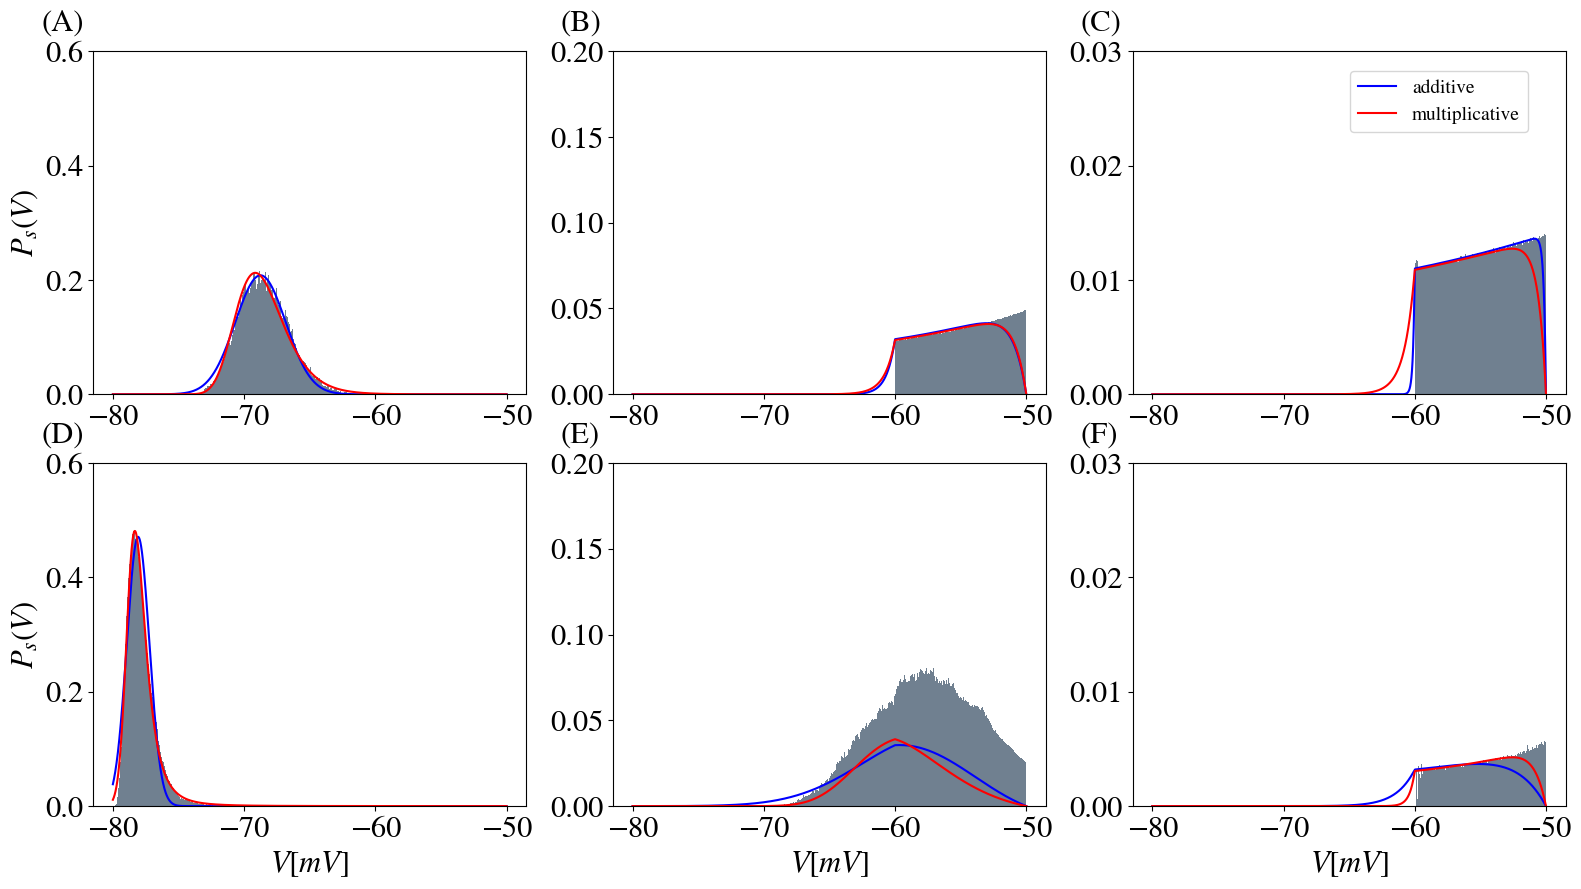

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(19,10), dpi=100, squeeze=False)

axs[0][0].annotate("(A)", xy=(-0.12, 1.06), xycoords="axes fraction")
axs[0][1].annotate("(B)", xy=(-0.12, 1.06), xycoords="axes fraction")
axs[0][2].annotate("(C)", xy=(-0.12, 1.06), xycoords="axes fraction")
axs[1][0].annotate("(D)", xy=(-0.12, 1.06), xycoords="axes fraction")
axs[1][1].annotate("(E)", xy=(-0.12, 1.06), xycoords="axes fraction")
axs[1][2].annotate("(F)", xy=(-0.12, 1.06), xycoords="axes fraction")

axs[1][0].set_xlabel(r'$V[mV]$')
axs[1][1].set_xlabel(r'$V[mV]$')
axs[1][2].set_xlabel(r'$V[mV]$')
axs[0][0].set_ylabel(r'$P_s(V)$')
axs[1][0].set_ylabel(r'$P_s(V)$')
axs[0][0].set_ylim(0,0.6)
axs[0][1].set_ylim(0,0.2)
axs[0][2].set_ylim(0,0.03)
axs[1][0].set_ylim(0,0.6)
axs[1][1].set_ylim(0,0.2)
axs[1][2].set_ylim(0,0.03)

axs[0][0].plot(df_V_distr_ad['Vk'], df_V_distr_ad[vec_tauE[0]], 'b-')
axs[0][0].plot(df_V_distr['Vk'], df_V_distr[vec_tauE[0]], 'r-')
axs[0][0].hist(df_sim[vec_tauE_label[0]], bins=500, density=True, color='slategray')

axs[0][1].plot(df_V_distr_ad['Vk'], df_V_distr_ad[vec_tauE[1]], 'b-')
axs[0][1].plot(df_V_distr['Vk'], df_V_distr[vec_tauE[1]], 'r-')
axs[0][1].hist(df_sim[vec_tauE_label[1]], bins=800, density=True, color='slategray')

axs[0][2].plot(df_V_distr_ad['Vk'], df_V_distr_ad[vec_tauE[2]], 'b-', label='additive')
axs[0][2].plot(df_V_distr['Vk'], df_V_distr[vec_tauE[2]], 'r-', label='multiplicative')
axs[0][2].hist(df_sim[vec_tauE_label[2]], bins=500, density=True, color='slategray')

axs[1][0].plot(df_V_distr_wI_ad['Vk'], df_V_distr_wI_ad[vec_tauE[0]], 'b-')
axs[1][0].plot(df_V_distr_wI['Vk'], df_V_distr_wI[vec_tauE[0]], 'r-')
axs[1][0].hist(df_sim_wI[vec_tauE_label[0]], bins=500, density=True, color='slategray')

axs[1][1].plot(df_V_distr_wI_ad['Vk'], df_V_distr_wI_ad[vec_tauE[1]], 'b-')
axs[1][1].plot(df_V_distr_wI['Vk'], df_V_distr_wI[vec_tauE[1]], 'r-')
axs[1][1].hist(df_sim_wI[vec_tauE_label[1]], bins=800, density=True, color='slategray')

axs[1][2].plot(df_V_distr_wI_ad['Vk'], df_V_distr_wI_ad[vec_tauE[2]], 'b-')
axs[1][2].plot(df_V_distr_wI['Vk'], df_V_distr_wI[vec_tauE[2]], 'r-')
axs[1][2].hist(df_sim_wI[vec_tauE_label[2]], bins=500, density=True, color='slategray')
fig.legend(bbox_to_anchor=(0.88, 0.86), loc=1, borderaxespad=0., prop={'size': 14})


In [10]:
np.sum(df_sim[1])

KeyError: 1

In [ ]:
hist, bin_edges = np.histogram(df_sim['50'], bins=200, density=True)
df_sim['50']
# plt.hist(df_sim['50'], bins=100, density=True)


0         -60.0
1         -60.0
2         -60.0
3         -60.0
4         -60.0
           ... 
1999995   -60.0
1999996   -60.0
1999997   -60.0
1999998   -60.0
1999999   -60.0
Name: 50, Length: 2000000, dtype: float64